## Data Loading, Visualisation and Cleaning

In [24]:
import pandas as pd
import os
import re
import datetime
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,average_precision_score
from sklearn import preprocessing
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import load_model
import numpy as np

%pylab inline

pd.options.display.max_rows = 4000

os.chdir("C:/Users/YJ/Documents/1) Learning/Udacity - Machine Learning/capstone/Udacity-Machine-Learning-Engineer-Capstone-Project")
import ReportFunctions
data = pd.read_hdf("DJUSTC Prices and Ratios.h5","Output")
data.index = data.date
data=data.drop("date",axis=1)
data.head()
return_days=30

Populating the interactive namespace from numpy and matplotlib


In [25]:
print('A quick glimpse of the data')
pivot= data.pivot_table(index=data.index,columns=data.ticker)
pivot.columns.names = ['data_types','tickers']
pivot.head()

A quick glimpse of the data


data_types Book_Value_Per_Share_*_USD                                          \
tickers                          AABA   AAPL  ACIW   ADBE    ADI  ADSK   AKAM   
date                                                                            
2015-07-09                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-10                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-13                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-14                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-15                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   

data_types                       ...        volume                           \
tickers     AMAT   AMD   ANET    ...          VRSN      VSAT VSM       WDAY   
date                             ...                                          
2015-07-09  6.88 -0.42  10.61    ...      587436.0  326919.0 NaN  1293608.0   
2015-07-10  6.88 -0.42  10.61    ...      400388.0  160234.0 NaN  1382053.0   
2015-07-13  6.88 -0.42  10.61    ...      423769.0  140892.0 NaN  1192943.0   
2015-07-14  6.88 -0.42  10.61    ...      568524.0  234940.0 NaN  1974882.0   
2015-07-15  6.88 -0.42  10.61    ...      744753.0  149075.0 NaN  2187854.0   

data_types                                                      
tickers           WDC  WP       XLNX   Z       ZAYO         ZG  
date                                                            
2015-07-09  2106557.0 NaN  3417044.0 NaN  1244784.0  1078572.0  
2015-07-10  1960616.0 NaN  2506968.0 NaN   633860.0  7287974.0  
2015-07-13  3047139.0 NaN  2201036.0 NaN   886011.0  2204882.0  
2015-07-14  3203009.0 NaN  2164689.0 NaN   613392.0  2935162.0  
2015-07-15  3341257.0 NaN  1732800.0 NaN  1068277.0  1160518.0  

[5 rows x 2849 columns]

In [26]:
print('The size of the pivoted dataframe is', pivot.shape)
print('The range of the index is from ',pivot.index[0]," to ",pivot.index[-1])
print('The columns consist of ',len(pivot.columns.names),' levels which is ',pivot.columns.names)
print('There are ',len(pivot.columns.get_level_values('data_types').unique())," different data types for each of the ", 
     len(pivot.columns.get_level_values('tickers').unique()), " unique tickers.")

The size of the pivoted dataframe is (750, 2849)
The range of the index is from  2015-07-09 00:00:00  to  2018-06-28 00:00:00
The columns consist of  2  levels which is  ['data_types', 'tickers']
There are  23  different data types for each of the  131  unique tickers.


In [27]:
ReportFunctions.describe_axis(pivot)

We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  23  unique values in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil', 'Dividends_USD',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_Per_Share_*_USD',
       'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%', 'Net_Income_USD_Mil',
       'Operating_Cash_Flow_USD_Mil', 'Operating_Income_USD_Mil',
       'Operating_Margin_%', 'Payout_Ratio_%_*', 'Revenue_USD_Mil',
       'Shares_Mil', 'Working_Capital_USD_Mil', 'adjusted_close', 'close',
       'dividend_amount', 'high', 'low', 'open', 'split_coefficient',
       'volume'],
      dtype='object', name='data_types')

 There are  131  unique values in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VRSN', 'VSAT', 'VSM', 'WDAY', 'WDC', 'WP', 'XLNX', 'Z', 'ZAYO', 'ZG'],
   

In [28]:
missing_data  = ReportFunctions.check_missing(pivot)
missing_data

,,Total,Percent
data_types,tickers,,
Cap_Spending_USD_Mil,WP,634,84.533333
split_coefficient,WP,634,84.533333
Book_Value_Per_Share_*_USD,WP,634,84.533333
Operating_Income_USD_Mil,WP,634,84.533333
low,WP,634,84.533333
Earnings_Per_Share_USD,WP,634,84.533333
close,WP,634,84.533333
Operating_Margin_%,WP,634,84.533333
Shares_Mil,WP,634,84.533333


In [29]:
data_points_per_ticker = len(pivot)* len(pivot.columns.get_level_values("data_types").unique())
print("Each ticker would have ", data_points_per_ticker, "data points")
print("Thus, if we have data missing for more than 15% of the data, we will remove those tickers")

tickers_to_remove = missing_data["Total"].groupby("tickers").sum().sort_values(ascending= False)
tickers_to_remove=tickers_to_remove.where(tickers_to_remove>=0.15*data_points_per_ticker).dropna()
tickers_to_remove

Each ticker would have  17250 data points
Thus, if we have data missing for more than 15% of the data, we will remove those tickers


tickers
WP      12046.0
DXC      9316.0
VSM      7550.0
DVMT     6737.0
Name: Total, dtype: float64

In [30]:
print("We will look to remove the tickers that does not have sufficiently complete data")
for ticker in tickers_to_remove.index:
    pivot.drop(ticker,axis=1,level=1,inplace=True)

We will look to remove the tickers that does not have sufficiently complete data


In [31]:
missing_data  = ReportFunctions.check_missing(pivot)
missing_data.head(20)

,,Total,Percent
data_types,tickers,,
Payout_Ratio_%_*,DBD,627,83.600000
Dividends_USD,IAC,627,83.600000
Payout_Ratio_%_*,IAC,627,83.600000
Free_Cash_Flow_Per_Share_*_USD,VMW,626,83.466667
Book_Value_Per_Share_*_USD,DY,626,83.466667
Working_Capital_USD_Mil,AABA,375,50.000000
Book_Value_Per_Share_*_USD,VMW,375,50.000000
Dividends_USD,CTSH,375,50.000000
Free_Cash_Flow_Per_Share_*_USD,AABA,375,50.000000


In [32]:
pivot.xs("DBD",axis=1,level=1).xs([r"Payout_Ratio_%_*","Earnings_Per_Share_USD","Dividends_USD"],axis=1).loc["2015-12-30":"2016-1-6"]

data_types,Payout_Ratio_%_*,Earnings_Per_Share_USD,Dividends_USD
date,,,
2015-12-30,105.5,1.12,1.15
2015-12-31,105.5,1.12,1.15
2016-01-04,NaN,-0.48,0.96
2016-01-05,NaN,-0.48,0.96
2016-01-06,NaN,-0.48,0.96


In [33]:
newPayoutRatio = (pivot.loc[:,"Dividends_USD"]/pivot.loc[:,"Earnings_Per_Share_USD"]).copy()
newPayoutRatio = newPayoutRatio.dropna(axis =1,how='all').fillna(0)
pivot.drop(r"Payout_Ratio_%_*",axis=1,inplace=True)
tickers = newPayoutRatio.columns
newPayoutRatio.columns = pd.MultiIndex.from_tuples([(r"Payout_Ratio_%_*",ticker) for ticker in tickers], names=['data_types', 'second'])
pivot = pd.concat([pivot,newPayoutRatio],axis=1)
display(pivot.loc[:,r"Payout_Ratio_%_*"].xs(["DBD"],axis=1).loc["2015-12-30":"2016-1-6"])

tickers,DBD
date,
2015-12-30,1.026786
2015-12-31,1.026786
2016-01-04,-2.000000
2016-01-05,-2.000000
2016-01-06,-2.000000


In [34]:
missing_data  = ReportFunctions.check_missing(pivot)
missing_data.groupby("data_types").sum().sort_values("Total",ascending=False)

,Total,Percent
data_types,,
Free_Cash_Flow_Per_Share_*_USD,14001,1866.800000
Working_Capital_USD_Mil,13522,1802.933333
Book_Value_Per_Share_*_USD,1353,180.400000
Dividends_USD,1249,166.533333
Earnings_Per_Share_USD,499,66.533333
split_coefficient,124,16.533333
open,124,16.533333
low,124,16.533333
high,124,16.533333


In [35]:
print("Given that we have 2 measures that are identical to each other namely Free_Cash_Flow_Per_Share_*_USD and 'Free_Cash_Flow_Per_Share_*_USD'.  ",
      "We can safely ignore the issues with the measure Free_Cash_Flow_Per_Share_*_USD \n")

print("Also, I note that there are shares that do not distribute dividends like IAC in recent years thus, it is fair to fill the NaN values in as zero.\n")
print("The same applies to that of Book_Value_Per_Share_*_USD and Working_Capital_USD_Mil.")

Given that we have 2 measures that are identical to each other namely Free_Cash_Flow_Per_Share_*_USD and 'Free_Cash_Flow_Per_Share_*_USD'.   We can safely ignore the issues with the measure Free_Cash_Flow_Per_Share_*_USD 

Also, I note that there are shares that do not distribute dividends like IAC in recent years thus, it is fair to fill the NaN values in as zero.

The same applies to that of Book_Value_Per_Share_*_USD and Working_Capital_USD_Mil.


In [36]:
pivot.loc[:,["Dividends_USD","Working_Capital_USD_Mil","Book_Value_Per_Share_*_USD"]] = pivot.loc[:,["Dividends_USD","Working_Capital_USD_Mil","Book_Value_Per_Share_*_USD"]].fillna(0)

In [37]:
missing_data  = ReportFunctions.check_missing(pivot)
missing_data[missing_data.index.get_level_values("data_types")!="Free_Cash_Flow_Per_Share_*_USD"]

,,Total,Percent
data_types,tickers,,
Earnings_Per_Share_USD,AABA,375,50.000000
Free_Cash_Flow_USD_Mil,HPE,71,9.466667
Operating_Income_USD_Mil,HPE,71,9.466667
volume,HPE,71,9.466667
split_coefficient,HPE,71,9.466667
dividend_amount,HPE,71,9.466667
Earnings_Per_Share_USD,HPE,71,9.466667
open,HPE,71,9.466667
Revenue_USD_Mil,HPE,71,9.466667


In [38]:
print("For the remaining details, we will provide a forward fill so as to ensure that there will be no gaps in due to data i.e. using the latest data and using it for data that we have yet to received. We will then replace all NA values with zero.")
pivot= pivot.fillna(method="ffill")
pivot= pivot.fillna(0)

For the remaining details, we will provide a forward fill so as to ensure that there will be no gaps in due to data i.e. using the latest data and using it for data that we have yet to received. We will then replace all NA values with zero.


In [39]:
ReportFunctions.describe_axis(pivot)

We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  23  unique values in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil', 'Dividends_USD',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_Per_Share_*_USD',
       'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%', 'Net_Income_USD_Mil',
       'Operating_Cash_Flow_USD_Mil', 'Operating_Income_USD_Mil',
       'Operating_Margin_%', 'Revenue_USD_Mil', 'Shares_Mil',
       'Working_Capital_USD_Mil', 'adjusted_close', 'close', 'dividend_amount',
       'high', 'low', 'open', 'split_coefficient', 'volume',
       'Payout_Ratio_%_*'],
      dtype='object', name='data_types')

 There are  127  unique values in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VMW', 'VRNT', 'VRSN', 'VSAT', 'WDAY', 'WDC', 'XLNX', 'Z', 'ZAYO',
       '

In [40]:
print("Below we see all the stock splits for all the shares for our data set:")
stock_splits = pivot.xs('split_coefficient',axis=1).stack().sort_values(ascending=False)
stock_splits = stock_splits[stock_splits!=1].swaplevel()
stock_splits =  stock_splits[stock_splits.values>0]
print(stock_splits)
ticker_sample = stock_splits.index.get_level_values("tickers")[0]

Below we see all the stock splits for all the shares for our data set:
tickers  date      
SSNC     2016-06-27    2.0000
HPE      2017-04-03    1.3348
CTXS     2017-02-01    1.2558
dtype: float64


Plotting the effect of a share split on opening prices:


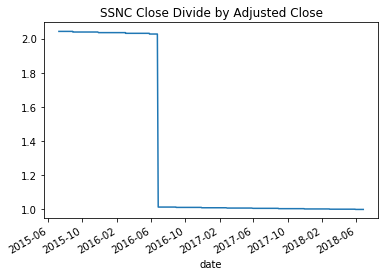

In [41]:
print("Plotting the effect of a share split on opening prices:")
(pivot.xs('close',axis=1,level=0).xs(ticker_sample,axis=1)/pivot.xs('adjusted_close',axis=1,level=0).xs(ticker_sample,axis=1)).plot(title = ticker_sample+" Close Divide by Adjusted Close")

In [42]:
adjusted_pivot=pivot.copy()

indices_to_adjust=['high', 'low', 'open', 'volume']
for index in indices_to_adjust:
    for ticker,date in stock_splits.index:
        adjust_slice = adjusted_pivot.xs(index,axis=1).xs(ticker,axis=1) 
        adjust_slice = adjust_slice[adjust_slice.index<date] / stock_splits[(ticker,date)]
        adjust_slice.name = (index,ticker)
        adjusted_pivot.update(adjust_slice) 


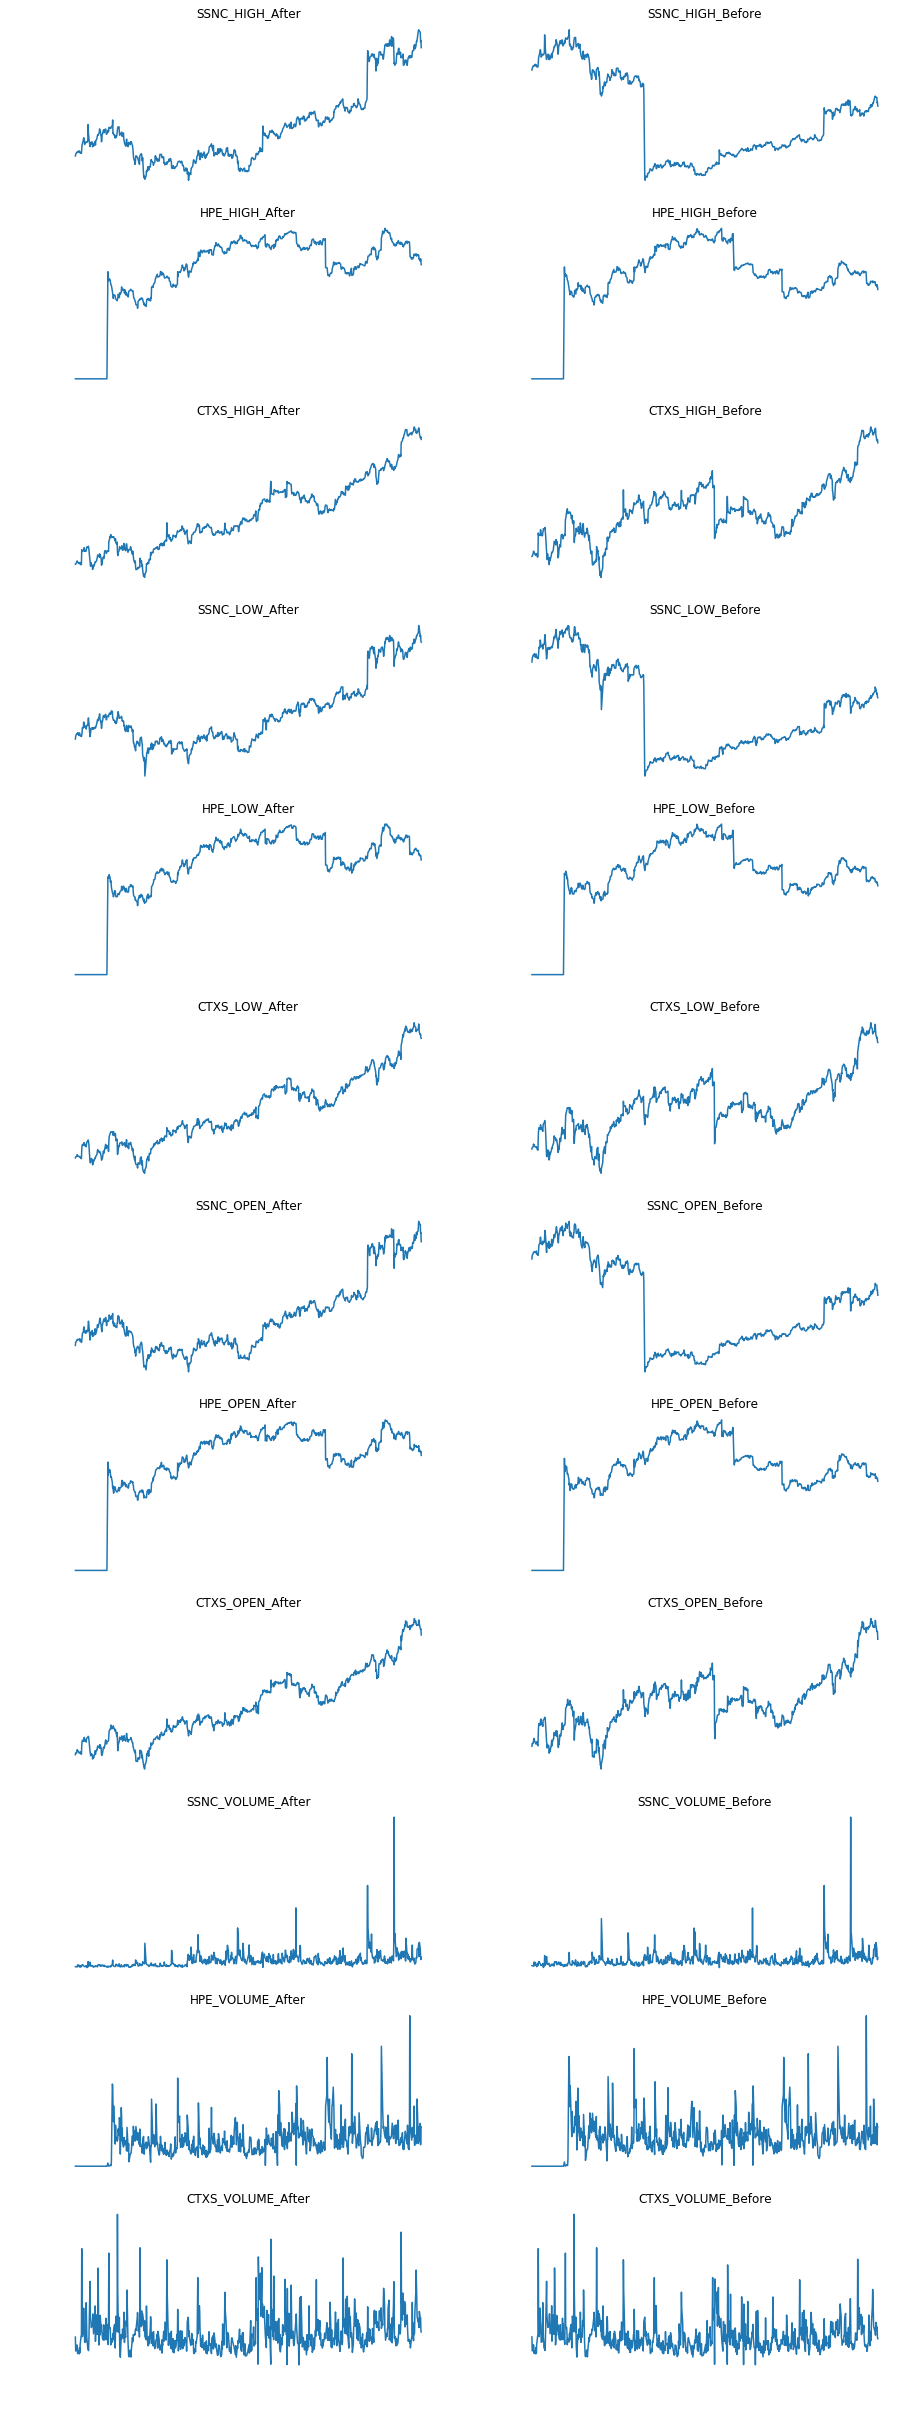

In [43]:
tickers= stock_splits.index.get_level_values("tickers").unique()
ReportFunctions.plot_before_after(adjusted_pivot, pivot, indices_to_adjust, tickers)            

In [44]:
print("We can see that after adjusting the various measures for stock split, the graphs look a lot smoother.")

We can see that after adjusting the various measures for stock split, the graphs look a lot smoother.


In [45]:
print("Given some of the variables are actually a different implementation of the same number, I will look to remove them")
adjusted_pivot = adjusted_pivot.drop(['Free_Cash_Flow_Per_Share_*_USD','close','split_coefficient','Dividends_USD'] ,axis=1)

Given some of the variables are actually a different implementation of the same number, I will look to remove them


C:\Users\YJ\Anaconda3\lib\site-packages\pandas\core\generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [46]:
print("Next, I will look to create the returns of each ticker and merging it with the main dataframe.")
adjusted_close = adjusted_pivot.loc[:,"adjusted_close"]
returns = ReportFunctions.returns_x_days(adjusted_close,days = return_days)
output = pd.concat([adjusted_pivot, returns],axis=1)

Next, I will look to create the returns of each ticker and merging it with the main dataframe.


In [47]:
ReportFunctions.describe_axis(output)
output.head()

We have  2  levels in columns
The levels are  ['data_types', 'tickers']

 There are  20  unique values in  data_types

  data_types  has the following unique values: 
 Index(['Book_Value_Per_Share_*_USD', 'Cap_Spending_USD_Mil',
       'Earnings_Per_Share_USD', 'Free_Cash_Flow_USD_Mil', 'Gross_Margin_%',
       'Net_Income_USD_Mil', 'Operating_Cash_Flow_USD_Mil',
       'Operating_Income_USD_Mil', 'Operating_Margin_%', 'Revenue_USD_Mil',
       'Shares_Mil', 'Working_Capital_USD_Mil', 'adjusted_close',
       'dividend_amount', 'high', 'low', 'open', 'volume', 'Payout_Ratio_%_*',
       'returns_x_days'],
      dtype='object', name='data_types')

 There are  127  unique values in  tickers

  tickers  has the following unique values: 
 Index(['AABA', 'AAPL', 'ACIW', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET',
       ...
       'VMW', 'VRNT', 'VRSN', 'VSAT', 'WDAY', 'WDC', 'XLNX', 'Z', 'ZAYO',
       'ZG'],
      dtype='object', name='tickers', length=127)
**************

data_types Book_Value_Per_Share_*_USD                                          \
tickers                          AABA   AAPL  ACIW   ADBE    ADI  ADSK   AKAM   
date                                                                            
2015-07-09                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-10                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-13                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-14                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   
2015-07-15                      29.86  22.53  5.03  13.74  16.23  9.99  17.41   

data_types                    ... returns_x_days                               \
tickers     AMAT   AMD   ANET ...            VMW VRNT VRSN VSAT WDAY WDC XLNX   
date                          ...                                               
2015-07-09  6.88 -0.42  10.61 ...            NaN  NaN  NaN  NaN  NaN NaN  NaN   
2015-07-10  6.88 -0.42  10.61 ...            NaN  NaN  NaN  NaN  NaN NaN  NaN   
2015-07-13  6.88 -0.42  10.61 ...            NaN  NaN  NaN  NaN  NaN NaN  NaN   
2015-07-14  6.88 -0.42  10.61 ...            NaN  NaN  NaN  NaN  NaN NaN  NaN   
2015-07-15  6.88 -0.42  10.61 ...            NaN  NaN  NaN  NaN  NaN NaN  NaN   

data_types               
tickers      Z ZAYO  ZG  
date                     
2015-07-09 NaN  NaN NaN  
2015-07-10 NaN  NaN NaN  
2015-07-13 NaN  NaN NaN  
2015-07-14 NaN  NaN NaN  
2015-07-15 NaN  NaN NaN  

[5 rows x 2463 columns]

## Creating Benchmark Model

In [ ]:

os.chdir("C:/Users/YJ/Documents/1) Learning/Udacity - Machine Learning/capstone/Submission")

In [ ]:
y = output.loc[:,"returns_x_days"]
X = output.iloc[:,output.columns.get_level_values("data_types")!="returns_x_days"]

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(X_scaled)

X_scaled.index = X.index
X_scaled.columns = X.columns

print(return_days)

X_train, X_test = X_scaled.iloc[:-return_days], X_scaled.iloc[-return_days*2:]
y_train, y_test = y.iloc[return_days:-return_days], y.iloc[-return_days:]
tickers = y.columns.get_level_values("tickers")

In [ ]:
score = []

clf_rfc = RandomForestClassifier(random_state = 7)

for ticker in tickers:
    X_train_unstack, y_train_unstack = ReportFunctions.data_for_modelling(X_train,y_train,ticker,days = return_days)
    X_test_unstack, y_test_unstack = ReportFunctions.data_for_modelling(X_test,y_test,ticker,days = return_days)
    #print(X_train_unstack.shape,y_train_unstack.shape,X_test_unstack.shape,y_test_unstack.shape)
    
    clf_rfc.fit(X_train_unstack,y_train_unstack)
    y_predict = clf_rfc.predict(X_test_unstack)
    #y_predict = [item[1] for item in clf_rfc.predict_proba(X_test_unstack)]
    
    #try:
    score.append(average_precision_score(y_test_unstack,y_predict))
        #print(ticker, accuracy_score(y_predict,y_test_unstack),(len(y_predict)==sum(y_predict) or sum(y_predict)==0))
    #except ValueError:
        #print(ticker," has an error", y_predict)
print(mean(score))
score

In [ ]:
score

In [ ]:
X_train_unstack, y_train_unstack = ReportFunctions.data_for_modelling(X_train,y_train,days = return_days)
X_test_unstack, y_test_unstack = ReportFunctions.data_for_modelling(X_test,y_test,days = return_days)

epochs = 50

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.hdf5', monitor='acc',
                               verbose=1, save_best_only=True, mode='max')

model = Sequential()
model.add(Dense(500, input_dim=X_train_unstack.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(300, input_dim=X_train_unstack.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(127, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
### TODO: Define your architecture.

model.summary()
model.fit(X_train_unstack, y_train_unstack,
          epochs=epochs, batch_size=100, callbacks=[checkpointer], verbose=0)

In [ ]:
X_test_unstack, y_test_unstack = ReportFunctions.data_for_modelling(X_test,y_test,days = return_days)
model=load_model('saved_models/weights.best.hdf5')
model.summary()
scores = model.evaluate(X_test_unstack, y_test_unstack, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))